In [96]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cnames = ['ref_name', 'ref_dir', 'read_name', 
          'star_ref_len', 'star_ref_start', 'star_read_len', 
          'star_alignment_len', 'star_identity', 'star_insertion', 'star_deletion' , 'star_mismatch',  
          'rmap_ref_len', 'rmap_ref_start', 'rmap_read_len', 
          'rmap_alignment_len', 'rmap_identity', 'rmap_insertion', 'rmap_deletion' , 'rmap_mismatch', 'status']
df_details = pd.read_csv('../combine_lab/STAR_vs_RapMap_comparison.detail', 
                 header=None, names=cnames)

In [59]:
summary = df_details.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
ref_dir,1988214.0,246.086227,133.738864,67.0,99.0,163.0,355.0,441.0
star_ref_len,1988214.0,-0.224289,1.587431,-18.0,0.0,0.0,0.0,0.0
star_ref_start,1988214.0,2107.662517,3019.421875,0.0,415.0,1224.0,2674.0,72357.0
star_read_len,1988214.0,48.604306,15.897743,0.0,54.0,54.0,54.0,54.0
star_alignment_len,1988214.0,48.834191,15.893854,0.0,54.0,54.0,54.0,65.0
star_identity,1988214.0,48.603812,15.897612,0.0,54.0,54.0,54.0,54.0
star_insertion,1988214.0,0.000493,0.028934,0.0,0.0,0.0,0.0,5.0
star_deletion,1988214.0,0.006090,0.132203,0.0,0.0,0.0,0.0,11.0
star_mismatch,1988214.0,0.223795,1.587129,0.0,0.0,0.0,0.0,18.0
rmap_ref_len,1988214.0,22.035365,26.538794,0.0,0.0,0.0,54.0,54.0


In [56]:
%matplotlib inline

In [60]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

criterion = df_details['status'].map(lambda x: 'Nano' in x or x.startswith('Different'))
only_nano = df_details[criterion]
print "Length of STAR = ", len(only_nano)

criterion = df_details['status'].map(lambda x: 'Last' in x or x.startswith('Different'))
only_last = df_details[criterion]
print "Length of RMAP = ", len(only_last)


Length of STAR =  1797791
Length of RMAP =  811356


# Histogram of STAR Accuracy

Mean of %Identity =  99.5282421647
Length of STAR =  1797791


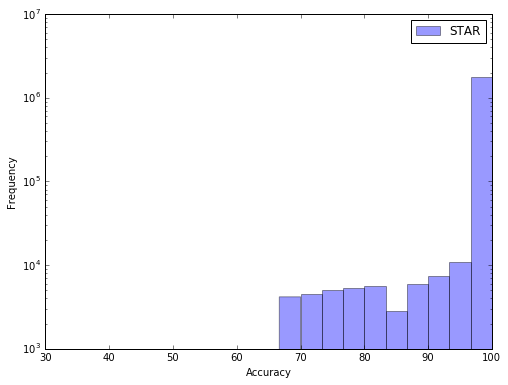

In [70]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))

criterion = only_nano['read_name'].map(lambda x: 'SRR' in x)
only_star = 100.00 * only_nano[criterion]['star_identity']/only_nano[criterion]['star_alignment_len']
print "Mean of %Identity = ", (100.00 * sum(only_nano[criterion]['star_identity'])/
                               sum(only_nano[criterion]['star_alignment_len'])) 

only_star = only_star.values
print "Length of STAR = ", len(only_star)

plt.xlabel("Accuracy")
plt.ylabel("Frequency")

plt.hist(only_star, alpha=0.40, label='STAR')
plt.xlim(30, 100)
plt.yscale('log', nonposy='clip')

plt.legend(loc='upper right')
plt.show()

# Histogram of RapMap Accuracy

Mean of %Identity =  99.0555646696
Length of RMAP =  811355


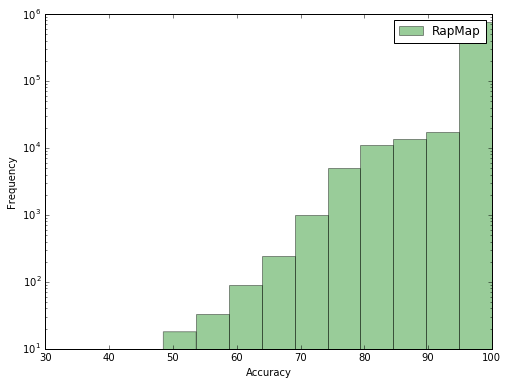

In [71]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))

criterion = only_last['rmap_identity'].map(lambda x: x > 0.0)
only_rmap = 100.00 * only_last[criterion]['rmap_identity']/only_last[criterion]['rmap_alignment_len']
print "Mean of %Identity = ", (100.00 * sum(only_last[criterion]['rmap_identity'])/
                               sum(only_last[criterion]['rmap_alignment_len'])) 

only_rmap = only_rmap.values
print "Length of RMAP = ", len(only_rmap)

plt.xlabel("Accuracy")
plt.ylabel("Frequency")

plt.hist(only_rmap, alpha=0.40, color='g', label='RapMap')
plt.xlim(30, 100)
plt.yscale('log', nonposy='clip')

plt.legend(loc='upper right')
plt.show()

In [72]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))

criterion = only_last['rmap_identity'].map(lambda x: x == 0.00)
print len(only_last[criterion])

1


In [91]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from matplotlib_venn import venn3
#from matplotlib_venn import venn2

#fig = plt.figure(figsize=(16,16))
#fig_count = 111#221

mytool = 'STAR'
othertool = 'RMAP'
"""
cnames = ['ref_name', 'ref_dir', 'read_name', 
          'nano_ref_len', 'nano_ref_start', 'nano_read_len', 
          'nano_alignment_len', 'nano_identity', 'nano_insertion', 'nano_deletion' , 'nano_mismatch',  
          'last_ref_len', 'last_ref_start', 'last_read_len', 
          'last_alignment_len', 'last_identity', 'last_insertion', 'last_deletion' , 'last_mismatch', 'status']

"""

print "STAR VS RAPMAP: The following table is prepared considering only one alignment for each read. We choose the alignment which has maximum identity. If multiple alignments are found with maximum identity then the alignment to the lexicographically smallest reference is chosen."
print "Contained: Alignment coordinates exactly matches while aligning to the same reference for the two different alignment methods. Overlapped: Coordinates of one alignment is found within another while aligning to the same reference. Outside: Alignment coordinates of one alignment is completely outside of another alignment while aligning to the same reference."
print "Only STAR or RAPMAP: Alignments of these reads were reported to different references by the two alignment methods. We need to analyze the alignments of these reads as well as the \'overlap\' and \'outside\' reads."
print ""

print "Total STAR\tTotal RMAP\tContained\tOverlap\t\tOutside\t\tOnly STAR\tOnly RMAP"
print "=========================================================================================================="

criterion = df_details['status'].map(lambda x: 'Nano' in x or x.startswith('Different'))
nano = df_details[criterion]['read_name']

criterion = df_details['status'].map(lambda x: 'Last' in x or x.startswith('Different'))
last = df_details[criterion]['read_name']

criterion1 = df_details['status'].map(lambda x: 'Contains' in x and x.startswith('Nano'))
df_nano = df_details[criterion1]['read_name']

criterion2 = df_details['status'].map(lambda x: 'Contains' in x and x.startswith('Last'))
df_last = df_details[criterion2]['read_name']

criterion3 = df_details['status'].map(lambda x: 'Outside' in x)
df_outside = df_details[criterion3]['read_name']

criterion4 = df_details['status'].map(lambda x: 'Overlap' in x)
df_overlap = df_details[criterion4]['read_name']

totalCommon = len(df_nano) + len(df_last) + len(df_outside) + len(df_overlap)
string = str(len(nano)) + "\t\t"
string += str(len(last)) + "\t\t"
string += str(len(df_nano) + len(df_last)) + '\t\t'
string += str(len(df_overlap)) + '\t\t';
string += str(len(df_outside)) + '\t\t'
string += str(len(nano) - totalCommon) + '\t\t'
string += str(len(last) - totalCommon)
print string


STAR VS RAPMAP: The following table is prepared considering only one alignment for each read. We choose the alignment which has maximum identity. If multiple alignments are found with maximum identity then the alignment to the lexicographically smallest reference is chosen.
Contained: Alignment coordinates exactly matches while aligning to the same reference for the two different alignment methods. Overlapped: Coordinates of one alignment is found within another while aligning to the same reference. Outside: Alignment coordinates of one alignment is completely outside of another alignment while aligning to the same reference.
Only STAR or RAPMAP: Alignments of these reads were reported to different references by the two alignment methods. We need to analyze the alignments of these reads as well as the 'overlap' and 'outside' reads.

Total STAR	Total RMAP	Contained	Overlap		Outside		Only STAR	Only RMAP
1797791		811356		9176		329331		277529		1181755		195320


# Analyzing Set of Contained Reads

Length of Contained =  9176
Length of Color Array =  9176


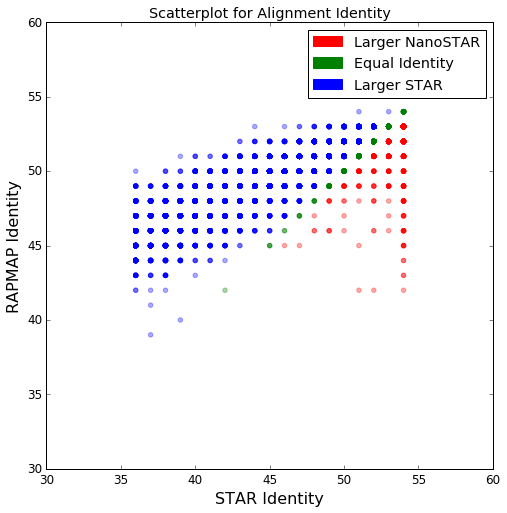

In [98]:
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt

mpl.rcParams.update({'font.size': 12})

criterion = df_details['status'].map(lambda x: 'Contains' in x)
df_contains = df_details[criterion]
print "Length of Contained = ", len(df_contains)

star = df_contains['star_identity'].values 
rmap = df_contains['rmap_identity'].values
contains_color = []

for i in range(0, len(star)):
    diff = star[i] - rmap[i]
    if(diff > 0):
        contains_color.append('r')
    elif(diff == 0):
        contains_color.append('g')
    else:
        contains_color.append('b')
    #if(len(color_array) % 100000 == 0):
    #    break

print "Length of Color Array = ", len(contains_color)
    
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('STAR Identity', fontsize=16)
ax.set_ylabel('RAPMAP Identity', fontsize=16)
ax.set_title("Scatterplot for Alignment Identity")

ax.set_xlim(30, 60)
ax.set_ylim(30, 60)

plt.figtext(.15,.8, ftext, fontsize=14, ha='left')
plt.scatter(star, rmap, color=contains_color, alpha=0.33, marker='o', label='Contain')

patch_one = mpatches.Patch(color='red', label="Larger NanoSTAR")
patch_two = mpatches.Patch(color='green', label="Equal Identity")
patch_three = mpatches.Patch(color='blue', label="Larger STAR")
plt.legend(handles=[patch_one, patch_two, patch_three], loc='upper right')
plt.show()


# Analyzing Set of Outside Reads

Length of Outside =  277529
Length of Color Array =  277529


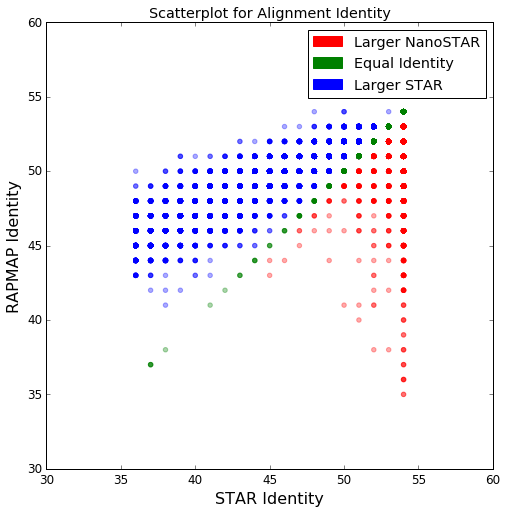

In [99]:
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt

mpl.rcParams.update({'font.size': 12})

criterion = df_details['status'].map(lambda x: 'Outside' in x)
df_outside = df_details[criterion]
print "Length of Outside = ", len(df_outside)

star = df_outside['star_identity'].values 
rmap = df_outside['rmap_identity'].values
outside_color = []

for i in range(0, len(star)):
    diff = star[i] - rmap[i]
    if(diff > 0):
        outside_color.append('r')
    elif(diff == 0):
        outside_color.append('g')
    else:
        outside_color.append('b')
    #if(len(color_array) % 100000 == 0):
    #    break

print "Length of Color Array = ", len(outside_color)
    
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('STAR Identity', fontsize=16)
ax.set_ylabel('RAPMAP Identity', fontsize=16)
ax.set_title("Scatterplot for Alignment Identity")

ax.set_xlim(30, 60)
ax.set_ylim(30, 60)

plt.figtext(.15,.8, ftext, fontsize=14, ha='left')
plt.scatter(star, rmap, color=outside_color, alpha=0.33, marker='o', label='Outside')

patch_one = mpatches.Patch(color='red', label="Larger NanoSTAR")
patch_two = mpatches.Patch(color='green', label="Equal Identity")
patch_three = mpatches.Patch(color='blue', label="Larger STAR")
plt.legend(handles=[patch_one, patch_two, patch_three], loc='upper right')
plt.show()


# Analyzing Set of Overlap Reads

Length of Overlap =  329331
Length of Color Array =  329331


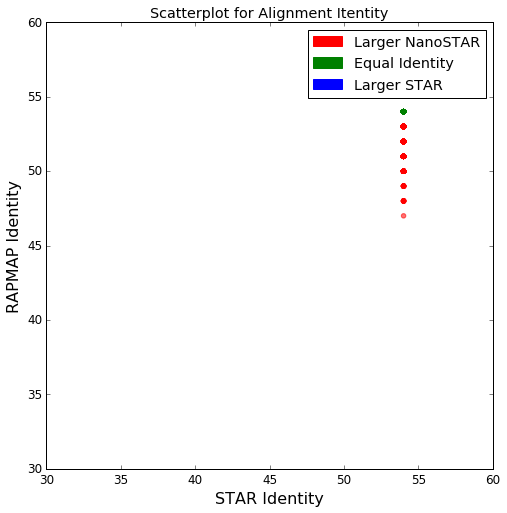

In [100]:
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt

mpl.rcParams.update({'font.size': 12})

criterion = df_details['status'].map(lambda x: 'Overlap' in x)
df_overlap = df_details[criterion]
print "Length of Overlap = ", len(df_overlap)

star = df_overlap['star_identity'].values 
rmap = df_overlap['rmap_identity'].values
overlap_color = []

for i in range(0, len(star)):
    diff = star[i] - rmap[i]
    if(diff > 0):
        overlap_color.append('r')
    elif(diff == 0):
        overlap_color.append('g')
    else:
        overlap_color.append('b')
    #if(len(color_array) % 100000 == 0):
    #    break

print "Length of Color Array = ", len(overlap_color)
    
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('STAR Identity', fontsize=16)
ax.set_ylabel('RAPMAP Identity', fontsize=16)
ax.set_title("Scatterplot for Alignment Itentity")

ax.set_xlim(30, 60)
ax.set_ylim(30, 60)

plt.figtext(.15,.8, ftext, fontsize=14, ha='left')
plt.scatter(star, rmap, color=overlap_color, alpha=0.33, marker='o', label='Overlap')

patch_one = mpatches.Patch(color='red', label="Larger NanoSTAR")
patch_two = mpatches.Patch(color='green', label="Equal Identity")
patch_three = mpatches.Patch(color='blue', label="Larger STAR")
plt.legend(handles=[patch_one, patch_two, patch_three], loc='upper right')
plt.show()


# Histogram of Only STAR Reads: Reads Aligned to Different Reference or Only Reported by STAR

Mean of %Identity =  99.5186683433
Length of STAR =  1181755


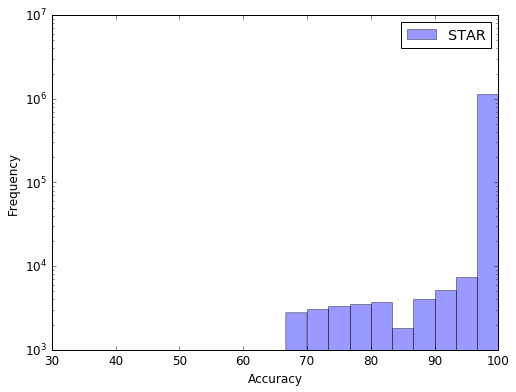

In [93]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))

criterion = only_nano['status'].map(lambda x: 'OnlyNano' in x or x.startswith('Different'))
only_star = 100.00 * only_nano[criterion]['star_identity']/only_nano[criterion]['star_alignment_len']
print "Mean of %Identity = ", (100.00 * sum(only_nano[criterion]['star_identity'])/
                               sum(only_nano[criterion]['star_alignment_len'])) 

only_star = only_star.values
print "Length of STAR = ", len(only_star)

plt.xlabel("Accuracy")
plt.ylabel("Frequency")

plt.hist(only_star, alpha=0.40, label='STAR')
plt.xlim(30, 100)
plt.yscale('log', nonposy='clip')

plt.legend(loc='upper right')
plt.show()

# Histogram of Only RAPMAP Reads: Reads Aligned to Different Reference or Only Reported by RAPMAP

Mean of %Identity =  97.6441591629
Length of STAR =  195320


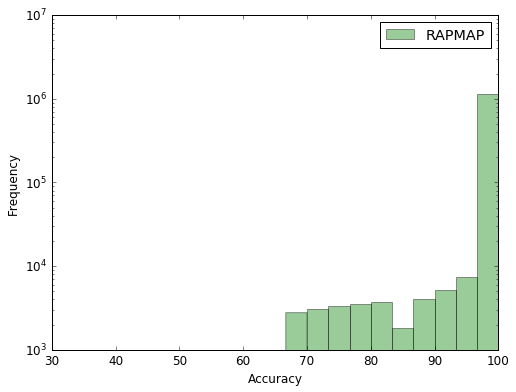

In [95]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))

criterion = only_last['status'].map(lambda x: 'OnlyLast' in x or x.startswith('Different'))
only_rmap = 100.00 * only_last[criterion]['star_identity']/only_last[criterion]['star_alignment_len']
print "Mean of %Identity = ", (100.00 * sum(only_last[criterion]['star_identity'])/
                               sum(only_last[criterion]['star_alignment_len'])) 

only_rmap = only_rmap.values
print "Length of STAR = ", len(only_rmap)

plt.xlabel("Accuracy")
plt.ylabel("Frequency")

plt.hist(only_star, alpha=0.40, color='green', label='RAPMAP')
plt.xlim(30, 100)
plt.yscale('log', nonposy='clip')

plt.legend(loc='upper right')
plt.show()